In [1]:
import pandas as pd

In [2]:
from google.colab import files
files.upload()

Saving weather_by_cities.csv to weather_by_cities.csv


{'weather_by_cities.csv': b'day,city,temperature,windspeed,event,\r\n01/01/2017,new york,32,6,Rain,\r\n01/02/2017,new york,36,7,Sunny,\r\n01/03/2017,new york,28,12,Snow,\r\n01/04/2017,new york,33,7,Sunny,\r\n01/01/2017,mumbai,90,5,Sunny,\r\n01/02/2017,mumbai,85,12,Fog,\r\n01/03/2017,mumbai,87,15,Fog,\r\n01/04/2017,mumbai,92,5,Rain,\r\n01/01/2017,paris,45,20,Sunny,\r\n01/02/2017,paris,50,13,Cloudy,\r\n01/03/2017,paris,54,8,Cloudy,\r\n01/04/2017,paris,42,10,Cloudy,\r\n'}

In [3]:
df = pd.read_csv("weather_by_cities.csv")
df

,day,city,temperature,windspeed,event,Unnamed: 5
0,01/01/2017,new york,32,6,Rain,NaN
1,01/02/2017,new york,36,7,Sunny,NaN
2,01/03/2017,new york,28,12,Snow,NaN
3,01/04/2017,new york,33,7,Sunny,NaN
4,01/01/2017,mumbai,90,5,Sunny,NaN
5,01/02/2017,mumbai,85,12,Fog,NaN
6,01/03/2017,mumbai,87,15,Fog,NaN
7,01/04/2017,mumbai,92,5,Rain,NaN
8,01/01/2017,paris,45,20,Sunny,NaN
9,01/02/2017,paris,50,13,Cloudy,NaN


In [4]:
g = df.groupby("city")
g

In [5]:
for city, data in g:
    print("city:",city)
    print("\n")
    print("data:",data) 

city: mumbai


data:           day    city  temperature  windspeed  event  Unnamed: 5
4  01/01/2017  mumbai           90          5  Sunny         NaN
5  01/02/2017  mumbai           85         12    Fog         NaN
6  01/03/2017  mumbai           87         15    Fog         NaN
7  01/04/2017  mumbai           92          5   Rain         NaN
city: new york


data:           day      city  temperature  windspeed  event  Unnamed: 5
0  01/01/2017  new york           32          6   Rain         NaN
1  01/02/2017  new york           36          7  Sunny         NaN
2  01/03/2017  new york           28         12   Snow         NaN
3  01/04/2017  new york           33          7  Sunny         NaN
city: paris


data:            day   city  temperature  windspeed   event  Unnamed: 5
8   01/01/2017  paris           45         20   Sunny         NaN
9   01/02/2017  paris           50         13  Cloudy         NaN
10  01/03/2017  paris           54          8  Cloudy         NaN
11  01/04/20

In [6]:
g.get_group('mumbai')

,day,city,temperature,windspeed,event,Unnamed: 5
4,01/01/2017,mumbai,90,5,Sunny,NaN
5,01/02/2017,mumbai,85,12,Fog,NaN
6,01/03/2017,mumbai,87,15,Fog,NaN
7,01/04/2017,mumbai,92,5,Rain,NaN


In [7]:
g.max()

,day,temperature,windspeed,event,Unnamed: 5
city,,,,,
mumbai,01/04/2017,92,15,Sunny,NaN
new york,01/04/2017,36,12,Sunny,NaN
paris,01/04/2017,54,20,Sunny,NaN


In [8]:
g.mean()

,temperature,windspeed,Unnamed: 5
city,,,
mumbai,88.50,9.25,NaN
new york,32.25,8.00,NaN
paris,47.75,12.75,NaN


In [9]:
g.min()

,day,temperature,windspeed,event,Unnamed: 5
city,,,,,
mumbai,01/01/2017,85,5,Fog,NaN
new york,01/01/2017,28,6,Rain,NaN
paris,01/01/2017,42,8,Cloudy,NaN


In [10]:
g.describe()

temperature                                ... Unnamed: 5                
               count   mean       std   min    25%  ...        min 25% 50% 75% max
city                                                ...                           
mumbai           4.0  88.50  3.109126  85.0  86.50  ...        NaN NaN NaN NaN NaN
new york         4.0  32.25  3.304038  28.0  31.00  ...        NaN NaN NaN NaN NaN
paris            4.0  47.75  5.315073  42.0  44.25  ...        NaN NaN NaN NaN NaN

[3 rows x 24 columns]

In [11]:
g.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [12]:
g.count()

,day,temperature,windspeed,event,Unnamed: 5
city,,,,,
mumbai,4,4,4,4,0
new york,4,4,4,4,0
paris,4,4,4,4,0


city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

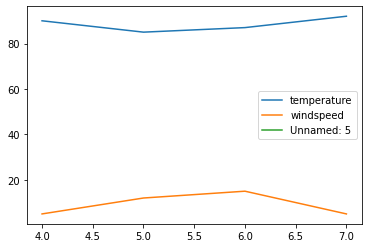

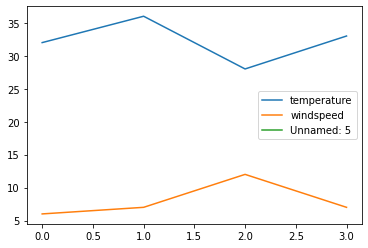

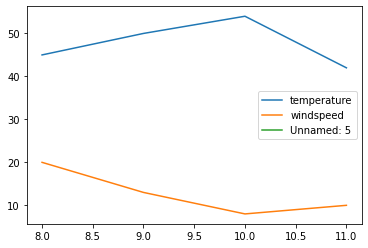

In [13]:
%matplotlib inline
g.plot()

In [14]:
def grouper(df, idx, col):
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'

In [15]:
g = df.groupby(lambda x: grouper(df, x, 'temperature'))
g

In [16]:
for key, d in g:
    print("Group by Key: {}\n".format(key))
    print(d)

Group by Key: 50-60

           day   city  temperature  windspeed   event  Unnamed: 5
9   01/02/2017  paris           50         13  Cloudy         NaN
10  01/03/2017  paris           54          8  Cloudy         NaN
Group by Key: 80-90

          day    city  temperature  windspeed  event  Unnamed: 5
4  01/01/2017  mumbai           90          5  Sunny         NaN
5  01/02/2017  mumbai           85         12    Fog         NaN
6  01/03/2017  mumbai           87         15    Fog         NaN
Group by Key: others

           day      city  temperature  windspeed   event  Unnamed: 5
0   01/01/2017  new york           32          6    Rain         NaN
1   01/02/2017  new york           36          7   Sunny         NaN
2   01/03/2017  new york           28         12    Snow         NaN
3   01/04/2017  new york           33          7   Sunny         NaN
7   01/04/2017    mumbai           92          5    Rain         NaN
8   01/01/2017     paris           45         20   Sunny        